In [1]:
from transformers import SwinModel

from PIL import Image

In [2]:
# Load pretrained Swin Transformer
swin_model = SwinModel.from_pretrained("microsoft/swin-tiny-patch4-window7-224")

swin_model

/Users/yesidcano/miniforge3/envs/torch-gpu/lib/python3.8/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1673856676759/work/aten/src/ATen/native/TensorShape.cpp:3454.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Some weights of the model checkpoint at microsoft/swin-tiny-patch4-window7-224 were not used when initializing SwinModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing SwinModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing SwinModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequ

SwinModel(
  (embeddings): SwinEmbeddings(
    (patch_embeddings): SwinPatchEmbeddings(
      (projection): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
    )
    (norm): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
    (dropout): Dropout(p=0.0, inplace=False)
  )
  (encoder): SwinEncoder(
    (layers): ModuleList(
      (0): SwinStage(
        (blocks): ModuleList(
          (0-1): 2 x SwinLayer(
            (layernorm_before): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
            (attention): SwinAttention(
              (self): SwinSelfAttention(
                (query): Linear(in_features=96, out_features=96, bias=True)
                (key): Linear(in_features=96, out_features=96, bias=True)
                (value): Linear(in_features=96, out_features=96, bias=True)
                (dropout): Dropout(p=0.0, inplace=False)
              )
              (output): SwinSelfOutput(
                (dense): Linear(in_features=96, out_features=96, bias=True)
      

# Feature extractor
Images are normalized and resized to 224 pixels.

In [3]:
# Image feature extractor (like the tokenizer but for images)
from transformers import AutoFeatureExtractor

feature_extractor = AutoFeatureExtractor.from_pretrained("microsoft/swin-tiny-patch4-window7-224")

#Image preprocessing is the same as that of the pretraining
# mean and standard deviation for each channel RGB
feature_extractor

ViTFeatureExtractor {
  "do_normalize": true,
  "do_resize": true,
  "feature_extractor_type": "ViTFeatureExtractor",
  "image_mean": [
    0.485,
    0.456,
    0.406
  ],
  "image_std": [
    0.229,
    0.224,
    0.225
  ],
  "resample": 3,
  "size": 224
}

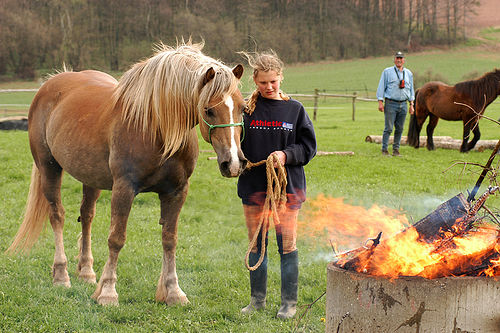

In [ ]:
from IPython.core.display_functions import display

# Download dataset from  https://www.kaggle.com/datasets/adityajn105/flickr8k
# path to dataset
img = Image.open('/Users/yesidcano/repos/datasets/Flickr_8k/Images/10815824_2997e03d76.jpg')
display(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


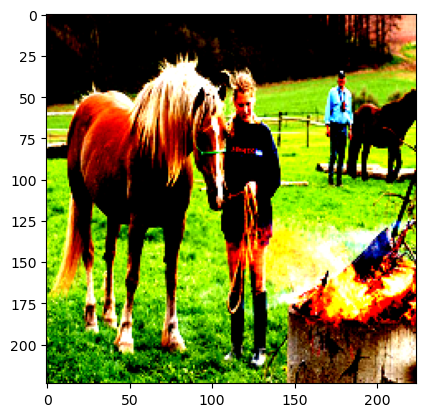

In [6]:
# What the image looks like after preprocessing.
import matplotlib.pyplot as plt

plt.imshow(feature_extractor(img).pixel_values[0].transpose(1, 2, 0))